In [1]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [2]:
!wget --no-check-certificate\
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip  # Mengupload berkas dataset yang diperlukan

--2021-06-28 05:02:09--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  5.86MB/s    in 77s     

2021-06-28 05:03:27 (3.97 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
# Proses ekstraksi pada file zip
import zipfile,os  # import modul os untuk mengakses folder dan modul zipfile agar bisa membaca file zip kita
local_zip = '/content/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
# ================== Mendefinisikan variabel folder paper, rock, dan scissors ============================
import os 
folder_paper = os.path.join('/content/rockpaperscissors/paper')
folder_rock = os.path.join('/content/rockpaperscissors/rock')
folder_scissors = os.path.join('/content/rockpaperscissors/scissors')

# ===================  Menampilakan jumlah foto dari paper, rock, dan scissors =============================
print('Jumlah total foto paper adalah', len(os.listdir(folder_paper)))
print('jumlah total foto rock adalah', len(os.listdir(folder_rock)))
print('jumlah total foto scissors adalah', len(os.listdir(folder_scissors)))


Jumlah total foto paper adalah 712
jumlah total foto rock adalah 726
jumlah total foto scissors adalah 750


Melihat contoh beberapa foto data yang ada di file dicoding. 
Dibawah ini terdapat contoh masing-masing 5 foto tangan berbentuk kertas, batu, gunting.

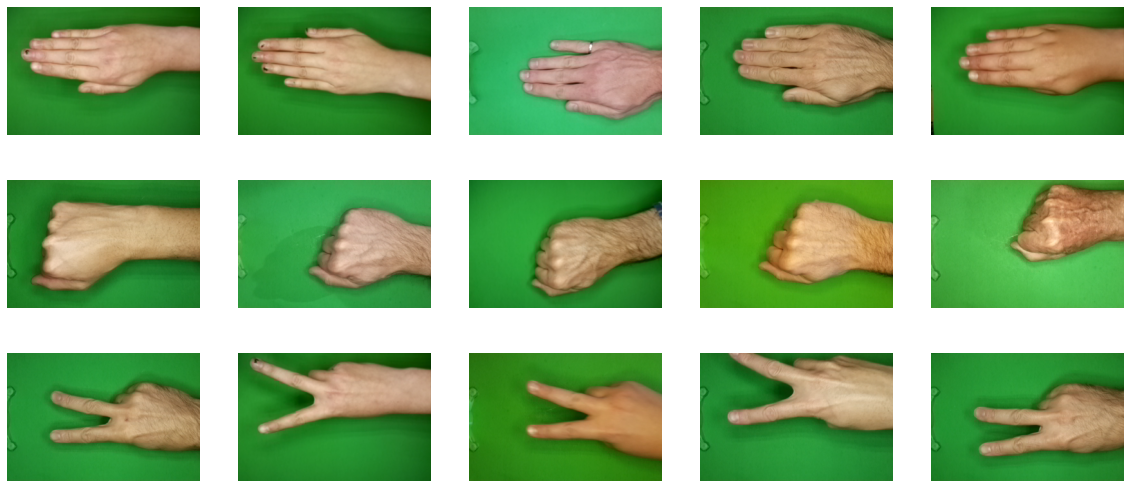

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

files_paper = os.listdir(folder_paper)
files_rock = os.listdir(folder_rock)
files_scissors = os.listdir(folder_scissors)

nrows = 3
ncols = 5

pic_index = 0 

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 3)

pic_index += 5
foto_beberapa_paper    = [os.path.join(folder_paper, fname)
                         for fname in files_paper[pic_index-5:pic_index]]
foto_beberapa_rock     = [os.path.join(folder_rock, fname)
                         for fname in files_rock[pic_index-5:pic_index]]
foto_beberapa_scissors = [os.path.join(folder_scissors, fname)
                         for fname in files_scissors[pic_index-5:pic_index]]

for i, img_path in enumerate(foto_beberapa_paper+foto_beberapa_rock+foto_beberapa_scissors):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [7]:
base_dir ='/content/rockpaperscissors/rps-cv-images'  # melakukan augmentasi dan pemisahan data training dan validastion
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    height_shift_range=0.2,
    width_shift_range=0.2,
    fill_mode='nearest',
    validation_split=0.4)

In [8]:
train_generator = train_datagen.flow_from_directory(
  base_dir,   # direktori data latih
  target_size=(150,150),  # mengubah resolusi seluruh gambar menjadi 150X150 piksel
  class_mode='categorical',  # karena ini merupakan masalah 3 kelas maka menggunakan class_mode = 'categorical
  shuffle=True,
  subset='training')

validation_generator = train_datagen.flow_from_directory(
  base_dir,  # direktori data validasi
  target_size=(150,150),  # mengubah resolusi seluruh gambar menjadi 150 X 150 piksel
  class_mode='categorical', # karena ini merupakan masalah 3 kelas maka menggunakan class_mode = 'categorical
  shuffle=True,
  subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [9]:
# Membuat Model Sequential
model = tf.keras.models.Sequential([
                                    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(256, activation='relu'),

    tf.keras.layers.Dense(512, activation='relu'),

    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()
model:'sequential_0'

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0

In [10]:
model.compile(loss ='categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics=['accuracy'])

In [12]:
history=model.fit(
    train_generator,
    steps_per_epoch=25,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=5,
    verbose=2
)

Epoch 1/30
25/25 - 41s - loss: 0.1846 - accuracy: 0.9364 - val_loss: 0.2891 - val_accuracy: 0.9312
Epoch 2/30
25/25 - 41s - loss: 0.1702 - accuracy: 0.9337 - val_loss: 0.2334 - val_accuracy: 0.9438
Epoch 3/30
25/25 - 40s - loss: 0.1673 - accuracy: 0.9377 - val_loss: 0.1821 - val_accuracy: 0.9312
Epoch 4/30
25/25 - 40s - loss: 0.1450 - accuracy: 0.9532 - val_loss: 0.1336 - val_accuracy: 0.9625
Epoch 5/30
25/25 - 40s - loss: 0.1832 - accuracy: 0.9377 - val_loss: 0.1423 - val_accuracy: 0.9563
Epoch 6/30
25/25 - 40s - loss: 0.1375 - accuracy: 0.9519 - val_loss: 0.1288 - val_accuracy: 0.9688
Epoch 7/30
25/25 - 40s - loss: 0.1491 - accuracy: 0.9481 - val_loss: 0.2084 - val_accuracy: 0.9563
Epoch 8/30
25/25 - 40s - loss: 0.1274 - accuracy: 0.9506 - val_loss: 0.1464 - val_accuracy: 0.9625
Epoch 9/30
25/25 - 40s - loss: 0.1582 - accuracy: 0.9455 - val_loss: 0.1091 - val_accuracy: 0.9750
Epoch 10/30
25/25 - 41s - loss: 0.1292 - accuracy: 0.9613 - val_loss: 0.0997 - val_accuracy: 0.9500
Epoch 11/

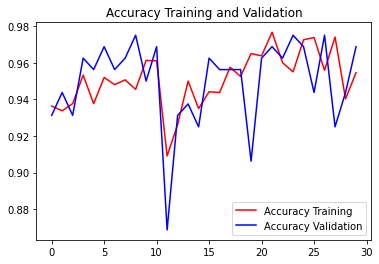

<Figure size 432x288 with 0 Axes>

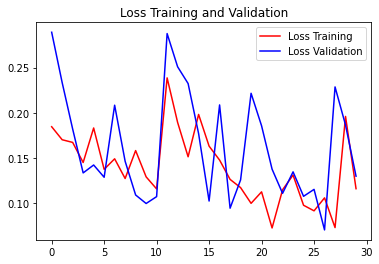

<Figure size 432x288 with 0 Axes>

In [17]:
import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Accuracy Training')
plt.plot(epochs, val_accuracy, 'b', label='Accuracy Validation')
plt.title('Accuracy Training and Validation')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Loss Training')
plt.plot(epochs, val_loss, 'b', label='Loss Validation')
plt.title('Loss Training and Validation')
plt.legend(loc=0)
plt.figure()
plt.show()

Saving 22.jpg to 22.jpg
22.jpg
Foto yang anda masukan merupakan bentuk Batu


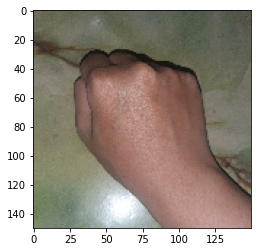

In [18]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded= files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0][0]==1:
    print('Foto yang anda masukan merupakan bentuk Kertas')
  elif classes[0][1]==1:
    print('Foto yang anda masukan merupakan bentuk Batu')
  elif classes[0][2]==1:
    print('Foto yang anda masukan merupakan bentuk Gunting')
  else:
    print("Foto yang anda masukan bukan Kertas, Batu, dan Gunting")

In [19]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.95):
      print('\nPelatihan dihentikan karena akurasi model sudah lebih dari 95%\n')
      self.model.stop_training = True

callbacks = myCallback()

model = tf.keras.models.Sequential([
                                    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(256, activation='relu'),

    tf.keras.layers.Dense(512, activation='relu'),

    tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()
model:'sequential_0'

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36992)            